In [1]:
# Import 'pandas'
import pandas as pd

# Import 'numpy'
import numpy as np

# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Import 'accuracy_score'
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

In [3]:
# Import 'make_scorer', 'SVC', 'GridSearchCV', and 'ShuffleSplit'
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a linear discriminant analysis object
    clf = SVC(kernel='rbf', class_weight='balanced')
    
    # Create a dictionary for the parameters
    params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'clf', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [4]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('eeg_bands_vector.csv')

# Split the data into features and target label
target_raw = raw_data[raw_data.columns[-1]]
features_raw = raw_data.drop(raw_data.columns[-1], axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first fifteen records
display(raw_data.head(n=15))

The shape of the data: (320, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
0,103.269475,35.301611,58.788945,42.199337,23.230930,126.198815,32.738464,54.093381,43.805196,12.247193,...,38.636172,71.200497,54.203120,13.696985,92.107641,35.314204,60.888315,41.622016,18.976236,1
1,403.669527,41.654041,40.195124,48.581733,26.788820,505.839314,36.501577,38.842931,53.486473,19.808786,...,48.789915,60.516862,61.592903,20.157437,377.735895,43.066619,47.571934,45.946508,23.211017,1
2,279.681913,42.728691,59.158943,60.158431,43.388387,580.350972,41.431643,53.961462,69.933845,31.864779,...,49.689682,76.730780,74.876743,26.712685,253.148835,46.148680,62.597387,57.115552,40.443141,1
3,71.576528,38.844352,55.163006,57.258102,33.051653,87.058429,37.380815,47.816603,59.311980,19.491601,...,45.415377,73.985584,69.553425,19.441455,59.365327,34.604929,63.035697,53.399421,27.530638,1
4,116.145982,49.995544,59.266394,53.269744,32.984489,163.037531,47.377475,53.462605,58.579985,17.212473,...,52.285488,64.249160,62.508725,16.915303,108.367590,50.118503,61.493748,49.699174,26.495780,1
5,501.676720,88.082998,71.236165,83.941325,36.920180,640.779993,91.861289,67.910498,88.891027,21.913153,...,99.051925,79.944572,92.760369,18.845703,446.031096,85.946809,75.742545,78.753649,29.737570,1
6,148.374578,72.273416,81.681346,61.244402,38.699506,193.253043,62.857683,80.005660,64.449413,19.660855,...,61.015788,78.284923,76.106562,18.364603,139.172406,67.999502,76.344671,61.565494,30.466904,1
7,259.858972,146.635787,85.670787,98.155055,39.274131,333.310627,164.037267,87.214098,104.230331,23.191253,...,150.957626,100.594857,102.948843,23.772854,234.510584,137.458903,87.555341,93.246032,31.507964,1
8,3733.659303,178.437796,111.502562,91.508031,35.525932,4771.973834,210.178762,110.576358,102.903713,24.187438,...,179.194889,116.462813,101.181477,21.401281,3433.403745,167.229831,113.789640,87.581350,28.467054,1
9,366.269107,51.762981,92.887319,69.836665,29.683298,467.276986,52.536593,85.088481,72.640459,17.985143,...,58.479082,111.951150,79.085338,17.800621,318.557354,52.945107,101.763058,68.471393,23.857254,1


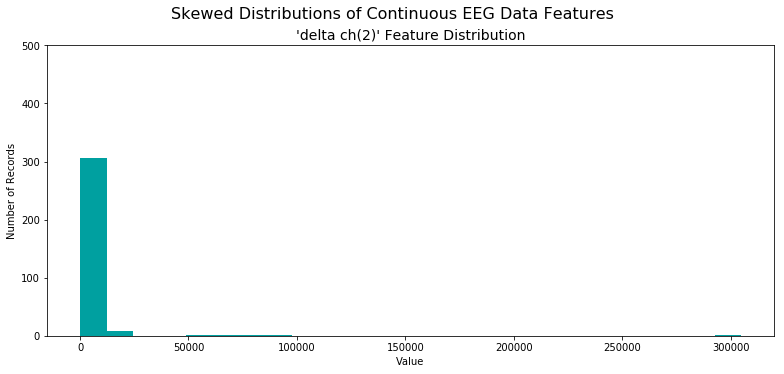

In [5]:
# Visualize skewed continuous features of original data
vs.distribution(raw_data, 6)

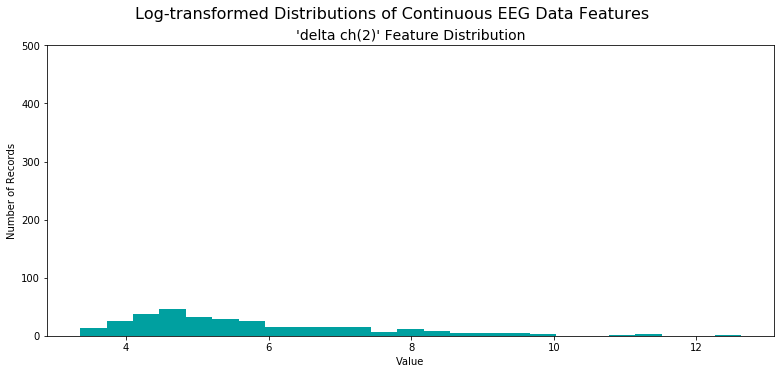

In [6]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, 6, transformed = True)

In [7]:
# Calculate Q1 (25th quantile of the data) for all features.
Q1 = features_log_transformed.quantile(0.25)

# Calculate Q3 (75th quantile of the data) for all features.
Q3 = features_log_transformed.quantile(0.75)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range).
IQR = Q3 - Q1
step = 1.5 * IQR

# Remove the outliers from the dataset.
features_log_transformed_out = features_log_transformed[~((features_log_transformed < (Q1 - step)) |(features_log_transformed > (Q3 + step))).any(axis=1)]

# Join the features and the target after removing outliers.
preprocessed_data_out = features_log_transformed_out.join(target_raw)
target_raw_out = preprocessed_data_out[preprocessed_data_out.columns[-1]]

# Print data shape after removing outliers.
print("The shape of the data after removing outliers: {}".format(preprocessed_data_out.shape))

# Success - Display the first ten records
display(preprocessed_data_out.head(n=10))

The shape of the data after removing outliers: (228, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
0,4.646979,3.591862,4.090821,3.765825,3.187630,4.845751,3.518639,4.009030,3.802324,2.583786,...,3.679742,4.279447,4.011019,2.687642,4.533756,3.592209,4.125331,3.752371,2.994543,1
1,6.003071,3.753122,3.718320,3.903622,3.324634,6.228194,3.624383,3.684945,3.997952,3.035375,...,3.907812,4.119311,4.136652,3.051991,5.936839,3.785703,3.883046,3.849009,3.186808,1
2,5.637222,3.778004,4.096990,4.113468,3.792978,6.365355,3.747894,4.006632,4.261748,3.492402,...,3.925722,4.353251,4.329110,3.321890,5.537920,3.853306,4.152572,4.062433,3.724322,1
3,4.284642,3.684981,4.028258,4.064883,3.527879,4.478001,3.647558,3.888070,4.099531,3.020015,...,3.837631,4.317296,4.256370,3.017565,4.100415,3.572484,4.159441,3.996354,3.350979,1
4,4.763421,3.931738,4.098775,3.993967,3.525904,5.100095,3.879034,3.997514,4.087320,2.902107,...,3.975664,4.178213,4.151177,2.885655,4.694715,3.934147,4.135067,3.925910,3.314033,1
5,6.219947,4.489568,4.279941,4.441961,3.635483,6.464246,4.531107,4.232809,4.498598,3.131711,...,4.605689,4.393765,4.540742,2.987988,6.102628,4.465297,4.340456,4.378942,3.425486,1
6,5.006457,4.294198,4.414994,4.131069,3.681339,5.269162,4.156657,4.394519,4.181278,3.028241,...,4.127389,4.373048,4.345188,2.963447,4.942873,4.234099,4.348272,4.136214,3.448936,1
9,5.906095,3.965810,4.542095,4.260377,3.423718,6.149060,3.980365,4.455376,4.299195,2.943657,...,4.085625,4.726955,4.383093,2.933890,5.766937,3.987967,4.632426,4.240915,3.213150,1
12,4.543129,3.874541,4.176984,3.889926,3.703324,4.582561,3.652930,4.062602,3.938066,2.779318,...,3.894796,4.432796,4.045645,2.739450,4.485954,3.913476,4.295304,3.826412,3.534140,1
13,4.361250,3.641721,4.094159,3.911562,3.571894,4.601306,3.423669,3.887865,3.866166,2.604213,...,3.656314,4.189662,4.043765,2.599520,4.366524,3.570738,4.186454,3.876615,3.425746,1


In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform_out = pd.DataFrame(scaler.fit_transform(features_log_transformed_out), columns=features_raw.columns)

# Show an example of a record with scaling applied
display(features_log_minmax_transform_out.head())

,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,delta ch(13),theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14)
0,0.291191,0.375309,0.635917,0.557041,0.630611,0.313875,0.540386,0.679715,0.622963,0.356338,...,0.372979,0.422995,0.697053,0.560604,0.252274,0.225618,0.413648,0.578643,0.579128,0.543088
1,0.578033,0.435048,0.514149,0.623333,0.683886,0.605108,0.579819,0.576576,0.707560,0.525631,...,0.553132,0.472746,0.656531,0.599733,0.345700,0.560398,0.495307,0.507951,0.626144,0.622258
2,0.500648,0.444265,0.637933,0.724286,0.866004,0.634003,0.625878,0.678952,0.821635,0.696963,...,0.505285,0.476653,0.715729,0.659674,0.414907,0.465215,0.523838,0.586591,0.729978,0.843595
3,0.214549,0.409805,0.615465,0.700913,0.762919,0.236403,0.588461,0.641220,0.751486,0.519873,...,0.348630,0.457436,0.706630,0.637019,0.336872,0.122221,0.405324,0.588595,0.697830,0.689860
4,0.315821,0.501216,0.638517,0.666796,0.762151,0.367457,0.674782,0.676050,0.746206,0.475671,...,0.368074,0.487547,0.671436,0.604257,0.303048,0.264023,0.557955,0.581483,0.663558,0.674647


In [9]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign preprocessed data frame to 'good_data'.
good_data = features_log_minmax_transform_out

# Assign the features to the variable Bands, and the labels to the variable state.
Bands = np.array(good_data)
state = np.array(target_raw_out)

# Shuffle and split the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42, shuffle=True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [10]:
# Import PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

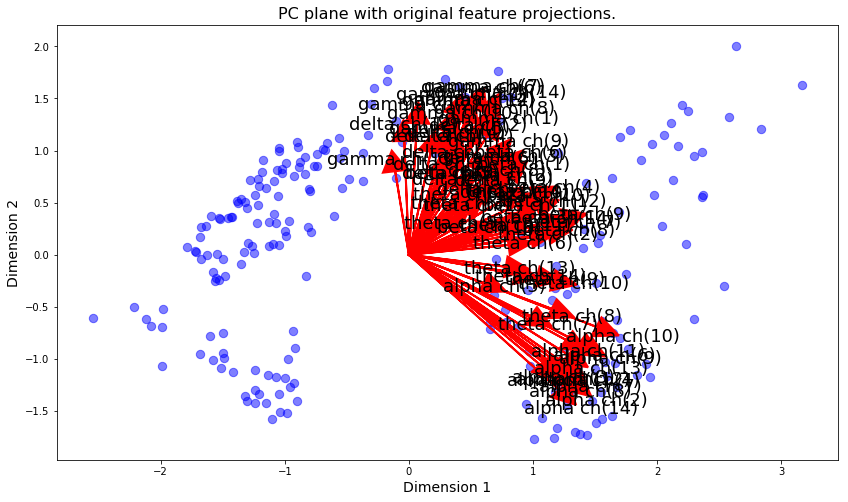

In [11]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

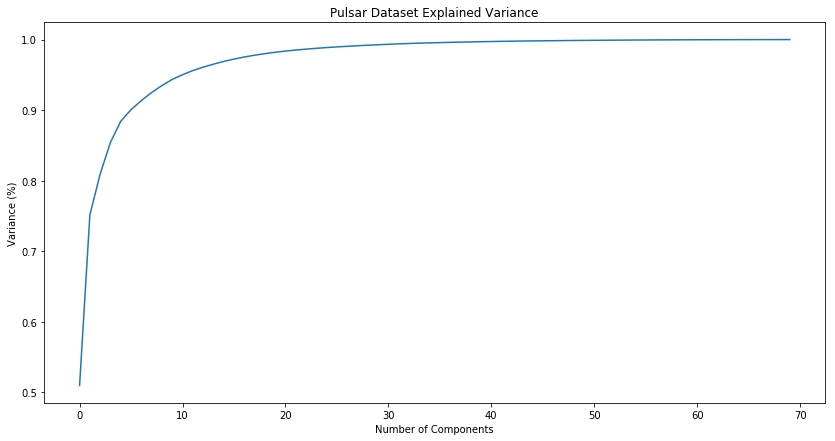

In [12]:
# Fitting the PCA algorithm with our training data.
pca = PCA().fit(X_train)

# Plotting the Cumulative Summation of the Explained Variance.
plt.figure(figsize = (14,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component.
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [13]:
# Import time
from time import time

# From the Explained Variance graph.
n_components = 20

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components)

# Pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratios:", pca.explained_variance_ratio_*100)
print("done in %0.3fs" % (time() - t0))


Extracting the top 20 eigenfaces from 182 faces
Explained variance ratios: [50.98751471 24.184817    5.78155243  4.48261764  2.9881549   1.64884649
  1.28399305  1.14051047  0.98736305  0.8686111   0.66416172  0.5865737
  0.48949276  0.41740462  0.39323979  0.32460053  0.3041739   0.24740126
  0.22503849  0.19446065]
done in 0.016s


In [14]:
# Fit the training data to the model using grid search
model = fit_model(X_train_pca, y_train)

# Produce the value for 'gamma' and 'C'
print("Parameter 'gamma' is {} for the optimal model.".format(model.get_params()['gamma']))
print("Parameter 'C' is {} for the optimal model.".format(model.get_params()['C']))

Parameter 'gamma' is 0.1 for the optimal model.
Parameter 'C' is 1000.0 for the optimal model.


In [15]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test_pca)

# Label states class.
states_class = ['Focused', 'De-Focused', 'Drowsy']

# Show predictions
for i, state in enumerate(y_pred):
    print("Predicted mental state for test {}'s bands: {}".format(i+1, states_class[state-1]))

Predicted mental state for test 1's bands: Drowsy
Predicted mental state for test 2's bands: Drowsy
Predicted mental state for test 3's bands: Focused
Predicted mental state for test 4's bands: Drowsy
Predicted mental state for test 5's bands: Focused
Predicted mental state for test 6's bands: Drowsy
Predicted mental state for test 7's bands: Focused
Predicted mental state for test 8's bands: Drowsy
Predicted mental state for test 9's bands: De-Focused
Predicted mental state for test 10's bands: Focused
Predicted mental state for test 11's bands: Drowsy
Predicted mental state for test 12's bands: Focused
Predicted mental state for test 13's bands: Focused
Predicted mental state for test 14's bands: De-Focused
Predicted mental state for test 15's bands: Focused
Predicted mental state for test 16's bands: Focused
Predicted mental state for test 17's bands: Focused
Predicted mental state for test 18's bands: De-Focused
Predicted mental state for test 19's bands: Drowsy
Predicted mental st

In [16]:
# Import 'f1_score'
from sklearn.metrics import f1_score

# Calculate the f1 score and assign it to the variable score.
score = f1_score(y_test, y_pred, average='micro')

# Print score.
print("F1 score: %0.1f %%" %(score*100))

F1 score: 97.8 %


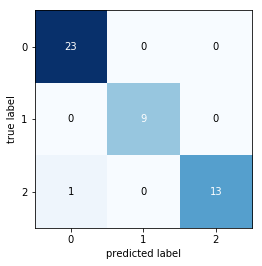

In [17]:
# Import 'confusion_matrix' and 'plot_confusion_matrix' from 'mlxtend'.
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Calculate the confusion matrix and assign it to the variable matrix.
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix.
fig, ax = plot_confusion_matrix(matrix)
plt.show()

In [18]:
# Import 'classification_report'
from sklearn.metrics import classification_report

# Calculate the classification report and assign it to the variable report.
report = classification_report(y_test, y_pred)

# Print the classification report.
print(report)

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00         9
           3       1.00      0.93      0.96        14

   micro avg       0.98      0.98      0.98        46
   macro avg       0.99      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46

